In [1]:
import numpy as np
from numpy import pi,sqrt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
import time


import matplotlib.pyplot as plt

# Create simulator instances
backend_svec = AerSimulator(method='statevector')
backend_qasm = AerSimulator()

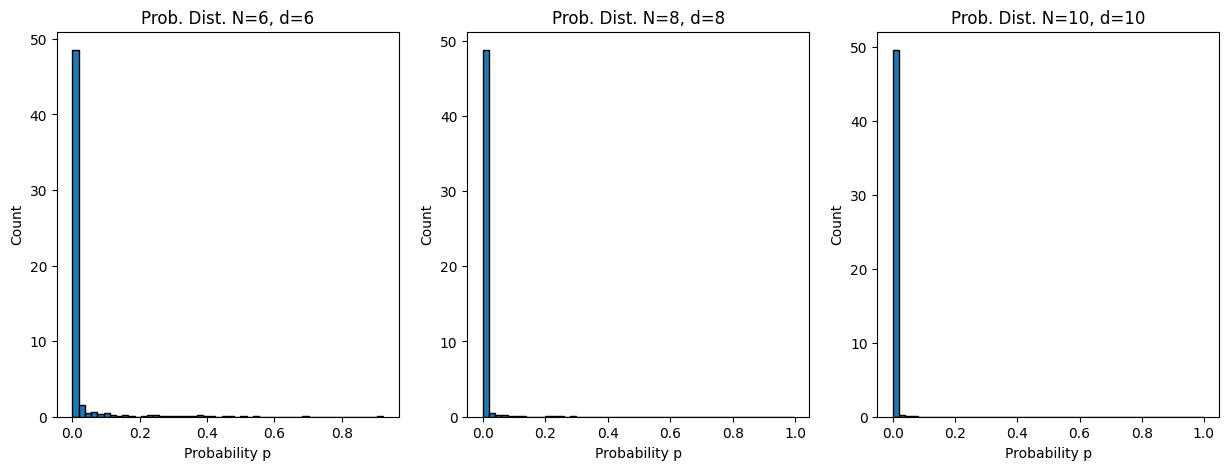

In [2]:
arr = [6, 8, 10]
nShots = 2**15

all_probs = {}
for i, N in enumerate(arr):
    d = N
    probs = []
    for _ in range(25):
        rand_circ = random_circuit(N, d, measure=False)
        rand_circ.save_statevector()
        transpiled_circuit = transpile(rand_circ, backend_qasm)
        result = backend_svec.run(transpiled_circuit).result()
        #counts = result.get_counts()
        sv = result.get_statevector()
        probs.extend(np.abs(sv.data)**2)

    #     for c in counts:
    #         prob = counts[c] / nShots
    #         probs.append(prob)
    
    all_probs[N] = probs


plt.figure(figsize=(15, 5))
for i, N in enumerate(arr):
    probs = all_probs[N]
    plt.subplot(1, 3, i+1)

    plt.hist(probs, bins=50, density=True, edgecolor='black')
    plt.title(f"Prob. Dist. N={N}, d={N}")
    plt.xlabel("Probability p")
    plt.ylabel("Count")
    


plt.show()


In [6]:
arr = [6, 8, 10]
all_stats = {}
for i, N in enumerate(arr):
    d = N
    times = []
    for _ in range(25):
        rand_circ = random_circuit(N, d, measure=False)
        rand_circ.save_statevector()
        transpiled_circuit = transpile(rand_circ, backend_qasm)
        start = time.time()
        result = backend_svec.run(transpiled_circuit).result()
        end = time.time()
        times.append(end - start)
    
    all_stats[N] = [np.mean(times), np.std(times)]



for N in arr:
     print(f"Mean Runtime for N={N} is {all_stats[N][0]}s")
     print(f"Standard Deviation of Runtimes for N={N} is {all_stats[N][1]}")

    

Mean Runtime for N=6 is 0.002040300369262695s
Standard Deviation of Runtimes for N=6 is 0.0008706481568475545
Mean Runtime for N=8 is 0.003160524368286133s
Standard Deviation of Runtimes for N=8 is 0.0008328506248199005
Mean Runtime for N=10 is 0.004800271987915039s
Standard Deviation of Runtimes for N=10 is 0.0017663541868680448
